In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as sps
import warnings
import math
warnings.simplefilter('ignore')

# The SQP Algorithm
## (Sequential quadratic programming)
Sequential quadratic programming (SQP) is a class of algorithms for solving non-linear optimization problems (NLP) in the real world. It is powerful enough for real problems because it can handle any degree of non-linearity including non-linearity in the constraints.

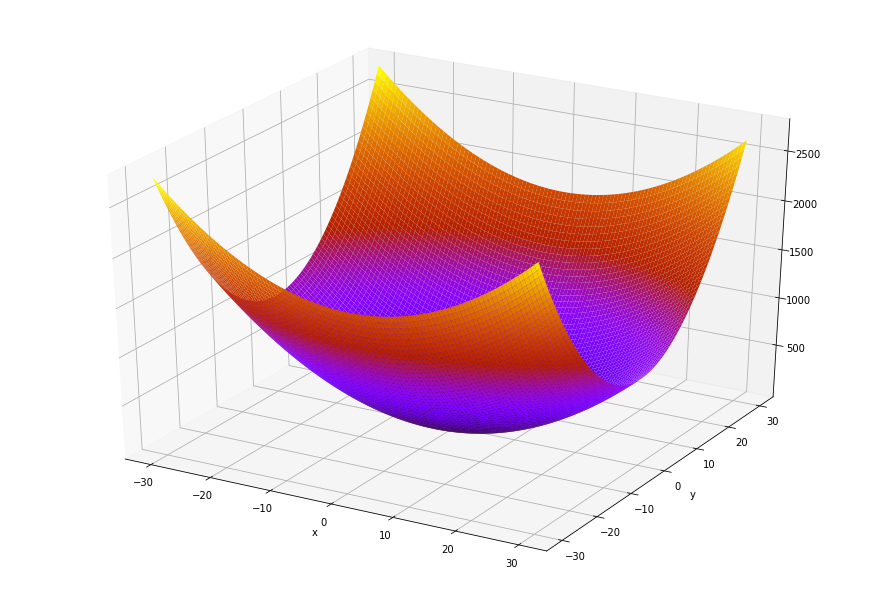

In [71]:
# our function
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
X = 30
N = 100
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = (x - 1)**2 + 2*y**2+ 0.37
#z2 = 2*x +1/6*(x+y)**2 + 4*x 
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='gnuplot')
# ax.plot_surface(x, y, z2, rstride=1, cstride=1, cmap='gnuplot')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [39]:
def F1(x, y):
    return (x - 1)**2 + 2*y**2 + 0.37

def Df1_dx(x):
    return 2*x-2

def Df1_dy(y):
    return 4*y

In [40]:
def DrawPoints(x, y, f):
    fig = plt.figure()
    ax = Axes3D(fig)
    plt.title("Путь алгоритма")
    ax.plot(x, y, f, color="m")
    ax.hold(True)
    ax.scatter(x, y, f)
    plt.show()

$L(x,\lambda,\mu)\text{ = f(x) +}\sum_i\lambda_i h_i(x)+\sum_i\mu_i g_i(x)$
 <br>
$\nabla L =\begin{bmatrix} \frac{dL}{dx} \\ \frac{dL}{d\lambda} \\ \frac{dL}{d\mu} \end{bmatrix} = \begin{bmatrix} \nabla f + \lambda \nabla h + \mu \nabla g^* \\ h \\ g^* \end{bmatrix} =0
$<br>$L = x^2 -2x+1 +2y^2+0.37-\mu x +\mu 5$

In [60]:
# first derivative of L:

def dLdx(x, mu_):
    return 2*x -2 - mu_

def dLdy(y):
    return 4*y

def dLdmu(x):
    return -x+5

$ \begin{bmatrix} x_{k+1} \\ \lambda_{k+1} \\ \mu_{k+1} \end{bmatrix} =  \begin{bmatrix} x_{k} \\ \lambda_{k} \\ \mu_{k} \end{bmatrix} - (\nabla^2 L_k)^{-1} \nabla L_k$<br>
$
 \nabla L =\begin{bmatrix} \frac{dL}{dx} \\ \frac{dL}{d\lambda} \\ \frac{dL}{d\mu} \end{bmatrix} = \begin{bmatrix} \nabla f + \lambda \nabla h + \mu \nabla g^* \\ h \\ g^* \end{bmatrix} 
$<br>$
\nabla^2 L = \begin{bmatrix} \nabla_{xx}^2 L & \nabla h & \nabla g \\ \nabla h & 0 & 0 \\ \nabla g & 0 & 0 \end{bmatrix} 
$<br>
$g(x, y) = -x + 5, h(x, y) = 0$

In [72]:
delta2L_inv = np.array([[0, 0, -1], [0, 1/2, 2],[ 1/2, 0, 1]])

In [69]:
def SQP():
    cur_x = 5.1 # starting point
    cur_y = 8.3
    cur_mu = 1
    x = np.array([cur_x])
    y = np.array([cur_y])
    f = np.array([F1(cur_x, cur_y)])
    iters = 0 # iteration counter
    precision = 0.0001 # epsilon
    max_iters = 10 # maximum number of iterations  
    while(iters < max_iters):
        prev_x = cur_x
        prev_y = cur_y
        prev_mu = cur_mu
        cur_x = cur_x - dLdmu(cur_x)
        cur_y = cur_y + 1/2*dLdy(cur_y)
        cur_mu = cur_mu + 1/2*dLdx(prev_x, cur_mu) + dLdmu(prev_x)
        x=np.append(x, cur_x)
        y=np.append(y, cur_y)
        f=np.append(f, F1(cur_x, cur_y))
        if(abs(F1(cur_x, cur_y) - F1(prev_x, prev_y)) < precision):
            break
        iters+=1
    DrawPoints(x, y, f)
    print("Minimum is at point {} {} and equals {}".format(cur_x, cur_y, F1(cur_x, cur_y)))
    print("Number of iterations {}".format(iters))

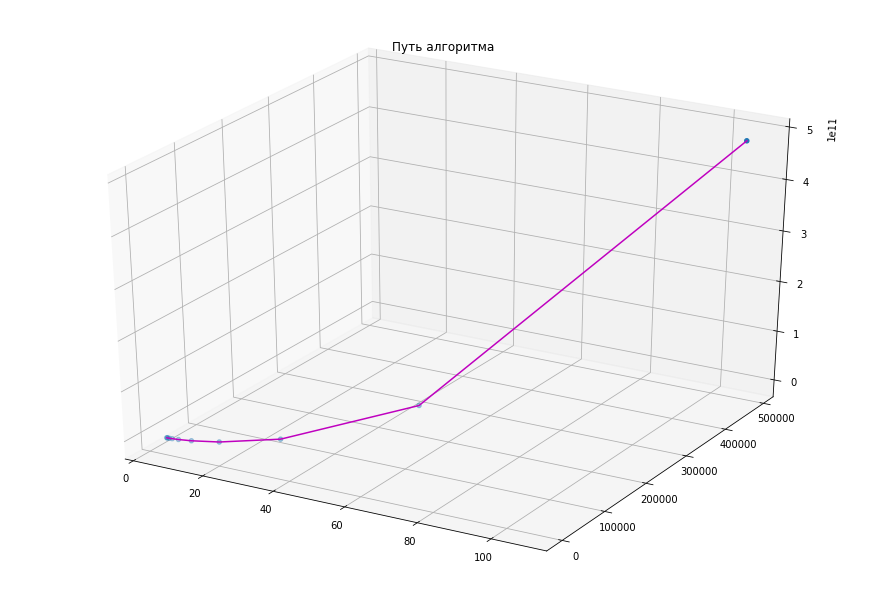

Minimum is at point 107.39999999999964 490106.70000000007 and equals 480409166091.11017
Number of iterations 10


In [70]:
SQP()

# Primal dual interior point method

Like the barrier method, primal-dual interior-point method aims to
compute (approximately) points on the central path.
This method is typically more efficient.
Under suitable conditions it has better than linear
convergence.

## Algorithm:
<br>
    • Define $\epsilon= ση(k−1)/m $ <br>
• Compute primal-dual update direction ∆y<br>
• Determine step size s <br>
• Update y:
$y^{(k)} = y^{
(k−1)} + s · ∆y$<br>
• Compute η
$\mu^{(k)} = −g(x
(k)
)
T u^{
(k)}$<br>
• Check stopping cond.

Primal-dual interior-point updates are also motivated by a Newton
step for solving these nonlinear equations, but without eliminating $\mu$

We try to solve problem: $min_{Ax - b = 0}x^TBx$<br>
$A = [1, 1]^T, b =[1], B = [[-1, -6], [2, 6]]$

In [40]:
def F(x):
    return (np.transpose(x).dot(np.array([[-1, -6], [2, 6]]))).dot(x)

In [12]:
def gradF(x):
    return -2*x[0] - 6*(x[0]+x[1]) + 4*x[0] + 12 *x[1]

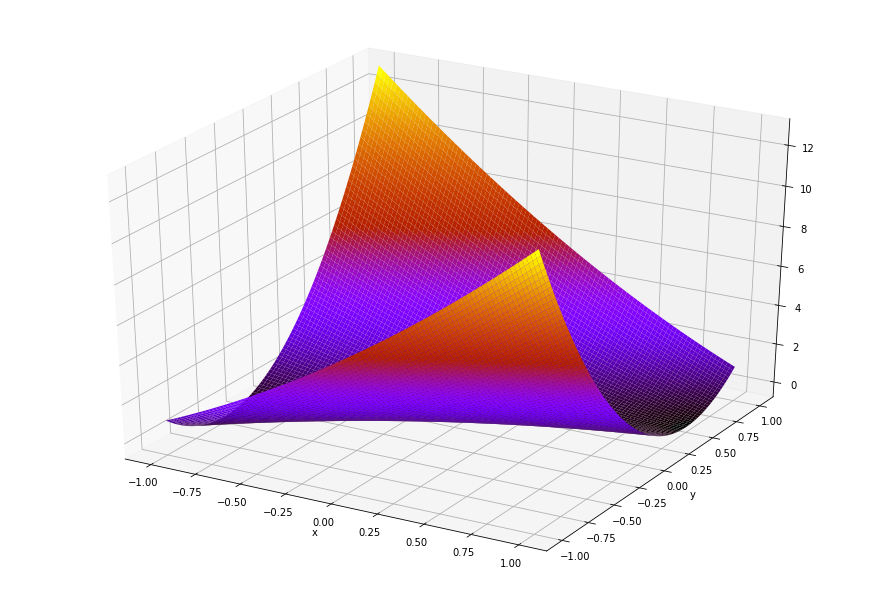

In [23]:
# our function
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
X = 1
N = 100
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = -1*x**2 - 6*x*y + 2*x**2 +6*y**2 # f(x) = x^T*B*x
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='gnuplot')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [4]:
def g(x):
    return x[0]+x[1]

$r_{dual} = ∇f(x) + ∇g(x)u + A^Tv$<br>
$r_{cent} = Ug(x) + \epsilon * 1$<br>
$r_{prim} = Ax − b$

In [20]:
A = np.array([1, 1])
sigma = 0.2
x_cur = np.array([[1/2], [1/2]])
v = np.array([[-1], [0]])
u = 1
mu = -1*u*np.transpose(g(x0))
epsilon = sigma*mu
r_pr = x_cur[0]+x_cur[1]
r_c = epsilon.sum()
r_d = gradF(x_cur)+np.transpose(A).dot(v)
x_prev = x_cur
s = 0.1
x_cur = x_prev + s*gradF(x_prev)
mu = -1*u*np.transpose(g(x))

In [28]:
def DrawPoints(x, y, f):
    fig = plt.figure()
    ax = Axes3D(fig)
    plt.title("Путь алгоритма")
    ax.plot(x, y, f, color="m")
    ax.hold(True)
    ax.scatter(x, y, f)
    plt.show()

In [44]:
def Method():
    A = np.array([1, 1])
    sigma = 0.2
    s = 0.1
    x_cur = np.array([[1/2], [1/2]])
    x=np.array([x_cur[0]])
    y=np.array([x_cur[1]])
    f=np.array(F(x_cur))
    v = np.array([[-1], [0]])
    u = 1
    iter = 0
    while(iter < 1000):
        mu = -1*u*np.transpose(g(x0))
        epsilon = sigma*mu
        r_pr = x_cur[0]+x_cur[1]
        r_c = epsilon.sum()
        r_d = gradF(x_cur)+np.transpose(A).dot(v)
        x_prev = x_cur
        delta_y = gradF(x_prev)# тут должна решаться система уравнений[2]
        x_cur = x_prev + s*delta_y
        x=np.append(x, x_cur[0])
        y=np.append(y, x_cur[1])
        f=np.append(f, F(x_cur))
        mu = -1*u*np.transpose(g(x))
        if((np.transpose(x_cur - x_prev)).dot(x_cur - x_prev)<0.001):
            break
    DrawPoints(x, y, f)
    print("Minimum is at point {} {} and equals {}".format(cur_x, cur_y, F1(cur_x, cur_y)))
    print("Number of iterations {}".format(iters))

## Bibliography
[1] http://www.cs.cmu.edu/~aarti/Class/10725_Fall17/Lecture_Slides/primal-dual.pdf<br>
[2] https://web.stanford.edu/class/ee364a/lectures/barrier.pdf
[3]https://optimization.mccormick.northwestern.edu/index.php/Sequential_quadratic_programming